In [1]:
%env KERAS_BACKEND=tensorflow

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, FloatSlider
# Keras functions
from keras.models import Sequential, Model
from keras.layers import Input, Lambda, concatenate
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2DTranspose, UpSampling2D
from keras.optimizers import SGD, Adam
from keras import metrics

# Keras dataset
from keras.datasets import mnist

# Keras utilis function
from keras.utils import np_utils

from keras import backend as K
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

x_train = x_train0.reshape(60000, -1)
x_test = x_test0.reshape(10000, -1)
print("train shape :%dx%d "%x_train.shape)
print("test shape :%dx%d "%x_test.shape)

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


train shape :60000x784 
test shape :10000x784 


In [2]:
#正規化
x_train -= x_train.min()
x_train = x_train/x_train.max()

# Autoencoder

In [3]:
x = Input(shape=(784,))
enc_1 = Dense(100, activation='sigmoid')
enc_2 = Dense(2, activation='sigmoid')

h = enc_2(enc_1(x))

dec_2 = Dense(100, activation='sigmoid')
dec_1 = Dense(784, activation='sigmoid')

x_hat = dec_1(dec_2(h))

autoencoder = Model(x, x_hat)
autoencoder.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 784)               79184     
Total params: 158,186
Trainable params: 158,186
Non-trainable params: 0
_________________________________________________________________


In [4]:
autoencoder.compile(loss='mse', optimizer=Adam())

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=2, verbose=2, mode='auto')

autoencoder.fit(x_train, x_train, batch_size=1024, epochs=1000,callbacks=[early_stopping])

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
60000/60000 [==============================] - 2s 32us/step - loss: 0.1146
Epoch 2/1000
60000/60000 [==============================] - 2s 28us/step - loss: 0.0706
Epoch 3/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0684
Epoch 4/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0679
Epoch 5/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0675
Epoch 6/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0671
Epoch 7/1000
60000/60000 [==============================] - 2s 28us/step - loss: 0.0668
Epoch 8/1000
60000/60000 [==============================] - 2s 33us/step - loss: 0.0665
Epoch 9/1000
60000/60000 [==============================] - 2s 40us/step - loss: 0.0660
Epoch 10/1000
60000/60000 [==============================] - 2s 40us/step - loss: 0.0653
Epoch 11/1000
60000/60000 [==============================] - 2s 35us/st

60000/60000 [==============================] - 2s 27us/step - loss: 0.0498
Epoch 182/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0498
Epoch 183/1000
60000/60000 [==============================] - 2s 26us/step - loss: 0.0497
Epoch 184/1000
60000/60000 [==============================] - 2s 26us/step - loss: 0.0497
Epoch 185/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0497
Epoch 186/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0496
Epoch 187/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0496
Epoch 188/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0496
Epoch 189/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0495
Epoch 190/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0495
Epoch 191/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0495
Epoch 192/1000
60000/6000

60000/60000 [==============================] - 2s 27us/step - loss: 0.0451
Epoch 364/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0451
Epoch 365/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0451: 0s - loss: 0.04
Epoch 366/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0451
Epoch 367/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0451
Epoch 368/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0450
Epoch 369/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0450
Epoch 370/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0450
Epoch 371/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0450
Epoch 372/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0450
Epoch 373/1000
60000/60000 [==============================] - 2s 27us/step - loss: 0.0449
Epoch 37

60000/60000 [==============================] - 2s 28us/step - loss: 0.0423: 0s - 
Epoch 544/1000
60000/60000 [==============================] - 2s 28us/step - loss: 0.0423
Epoch 545/1000
60000/60000 [==============================] - 2s 28us/step - loss: 0.0423
Epoch 546/1000
60000/60000 [==============================] - 2s 28us/step - loss: 0.0423
Epoch 547/1000
60000/60000 [==============================] - 2s 28us/step - loss: 0.0423
Epoch 548/1000
60000/60000 [==============================] - 2s 28us/step - loss: 0.0423
Epoch 549/1000
60000/60000 [==============================] - 2s 28us/step - loss: 0.0423
Epoch 550/1000
60000/60000 [==============================] - 2s 29us/step - loss: 0.0423
Epoch 551/1000
60000/60000 [==============================] - 2s 31us/step - loss: 0.0422
Epoch 552/1000
60000/60000 [==============================] - 2s 39us/step - loss: 0.0422
Epoch 553/1000
60000/60000 [==============================] - 2s 36us/step - loss: 0.0422
Epoch 554/1000
600

In [5]:
Encoder = Model(x, h)
Encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 78,702
Trainable params: 78,702
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Decoder 是由h開始，因此，我們先準備一個與h相同大小的 Input，並餵進 dec_2 及 dec_1

h_input = Input(shape=(2,))
Decoder = Model(h_input, dec_1(dec_2(h_input)))

Decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 784)               79184     
Total params: 79,484
Trainable params: 79,484
Non-trainable params: 0
_________________________________________________________________


In [7]:
idx = np.random.randint(x_train.shape[0])
print("第 %d 圖的 latent 表示為 %s" %(idx, Encoder.predict(x_train[idx: idx+1])))

第 11110 圖的 latent 表示為 [[0.14055395 0.00291413]]


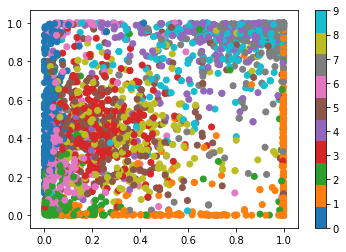

In [8]:
indices = np.random.randint(x_test.shape[0], size=3000)
latents = Encoder.predict(x_test[indices])
plt.scatter(latents[:, 0], latents[:, 1], c=y_test0[indices], cmap="tab10")
plt.colorbar()
plt.show()

In [9]:
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(0.05, 0.95, n)
grid_y = np.linspace(0.05, 0.95, n)

In [10]:
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[(n-i-1) * digit_size: (n - i) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

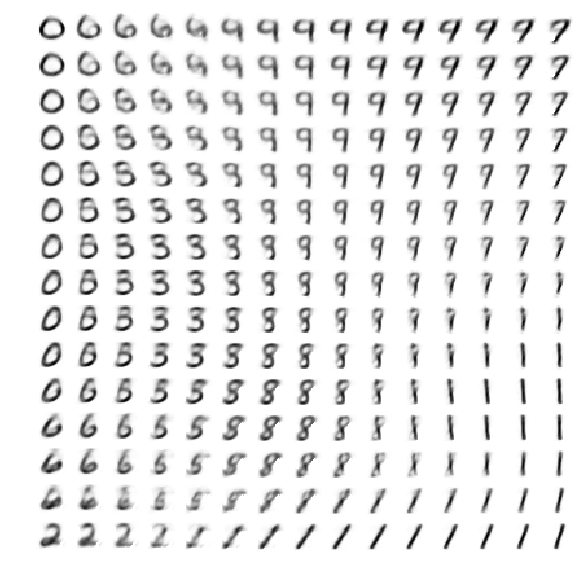

In [11]:
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys')
plt.axis('off')
plt.show()

# Variational Autoencoder (VAE)

進行常態抽樣並透過 Lambda 將其轉換成 Keras layer。

透過 $X\sim N(0, 1)\Rightarrow \mu+\sigma X\sim N(\mu, \sigma^2)$ 和 $\sigma = e^{\frac{\log{\sigma^2}}{2}}$，我們透過以下方式定義抽樣函數。

In [12]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(2,), mean=0., stddev=1) #𝑋∼𝑁(0,1)
    return z_mean + K.exp(z_log_var / 2) * epsilon #𝜇+𝜎𝑋

In [13]:
x = Input(shape=(784,))

#(100)ENCO
enc_1 = Dense(100, activation='sigmoid')
enc_x = enc_1(x)

#(訓練出數字分布的平均數和變異數)ENCO
enc_mean = Dense(2)
z_mean = enc_mean(enc_x)

enc_log_var = Dense(2)
z_log_var = enc_log_var(enc_x)

#抽樣層(2)DECO
z = Lambda(sampling, output_shape=(2,))([z_mean, z_log_var])#透過 Lambda包裝 sampling

#(100)DECO
dec_2 = Dense(100, activation='sigmoid')
dec_x = dec_2(z)

#(784)DECO
dec_1 = Dense(784, activation='sigmoid')
x_hat = dec_1(dec_x)

VAE = Model(x, x_hat)
VAE.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 100)          78500       input_3[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 2)            202         dense_5[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 2)            202         dense_5[0][0]                    
__________________________________________________________________________________________________
lambda_1 (

#  KL 散度
由於數字的分布未知，故 Loss 函數用KL散度來近似分布狀況

$p\sim N(\mu_1,\sigma_1^2)$, $q\sim N(\mu_2,\sigma_2^2)$， $KL(p, q) = \log\dfrac{\sigma_2}{\sigma_1} + \dfrac{\sigma_1^2+(\mu_1-\mu_2)^2}{2\sigma_2^2}-\dfrac{1}{2}$

In [14]:
#建立 Loss 函數
def vae_loss(x, x_recon):  
    recovery_loss = 784 * metrics.binary_crossentropy(x, x_recon)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return recovery_loss + kl_loss

#訓練
VAE.compile(loss=vae_loss, optimizer=Adam())
VAE.fit(x_train, x_train, batch_size=32, epochs=1000,callbacks=[early_stopping])

Epoch 1/1000
60000/60000 [==============================] - 8s 127us/step - loss: 194.9834
Epoch 2/1000
60000/60000 [==============================] - 7s 121us/step - loss: 180.2415
Epoch 3/1000
60000/60000 [==============================] - 7s 118us/step - loss: 178.3931
Epoch 4/1000
60000/60000 [==============================] - 7s 119us/step - loss: 174.8519
Epoch 5/1000
60000/60000 [==============================] - 8s 132us/step - loss: 170.6863
Epoch 6/1000
60000/60000 [==============================] - 7s 118us/step - loss: 167.7996
Epoch 7/1000
60000/60000 [==============================] - 8s 132us/step - loss: 165.8769
Epoch 8/1000
60000/60000 [==============================] - 8s 128us/step - loss: 164.3577
Epoch 9/1000
60000/60000 [==============================] - 8s 126us/step - loss: 163.0962
Epoch 10/1000
60000/60000 [==============================] - 7s 115us/step - loss: 161.7689
Epoch 11/1000
60000/60000 [==============================] - 7s 117us/step - loss: 160.62

In [15]:
VAE_Encoder = Model(x, z_mean)
VAE_Encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 202       
Total params: 78,702
Trainable params: 78,702
Non-trainable params: 0
_________________________________________________________________


In [16]:
VAE_Decoder = Model(h_input, dec_1(dec_2(h_input)))
VAE_Decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_9 (Dense)              (None, 784)               79184     
Total params: 79,484
Trainable params: 79,484
Non-trainable params: 0
_________________________________________________________________


In [17]:
idx = np.random.randint(x_train.shape[0])
print("第 %d 圖的 latent 表示為 %s" %(idx, VAE_Encoder.predict(x_train[idx: idx+1])))

第 37399 圖的 latent 表示為 [[-1.6107318 -1.9972084]]


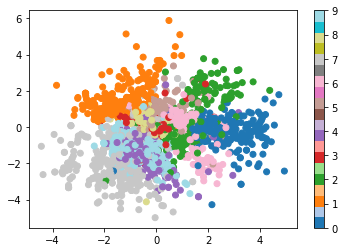

In [18]:
VAE_latents = VAE_Encoder.predict(x_test[indices])
plt.scatter(VAE_latents[:, 0], VAE_latents[:, 1], c=y_test0[indices], cmap='tab20')
plt.colorbar()
plt.show()

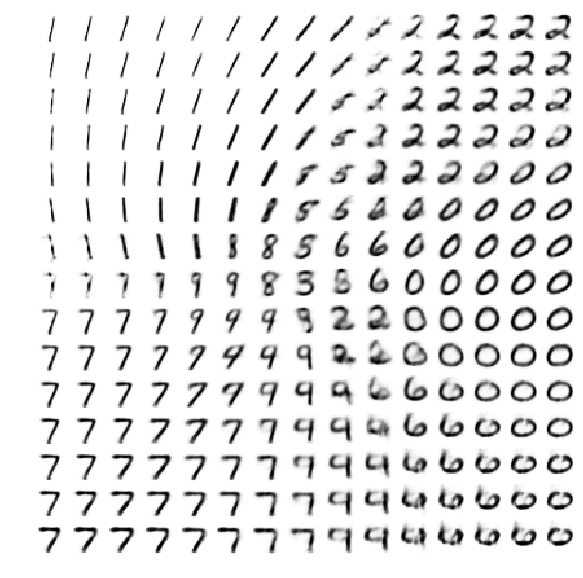

In [19]:
def normalized(x):
    x -= x.min()
    x /= x.max()
    return x
grid_x_vae = np.linspace(-4+0.05, 4-0.05, n)
grid_y_vae = np.linspace(-4+0.05, 4-0.05, n)
VAE_figure = np.zeros((digit_size * n, digit_size * n))
for i, yi in enumerate(grid_x_vae):
    for j, xi in enumerate(grid_y_vae):
        z_sample = np.array([[xi, yi]])
        x_decoded = VAE_Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        VAE_figure[(n-i-1) * digit_size: (n - i) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = normalized(digit)
plt.figure(figsize=(10, 10))
plt.imshow(VAE_figure, cmap='Greys')
plt.axis('off')
plt.show()

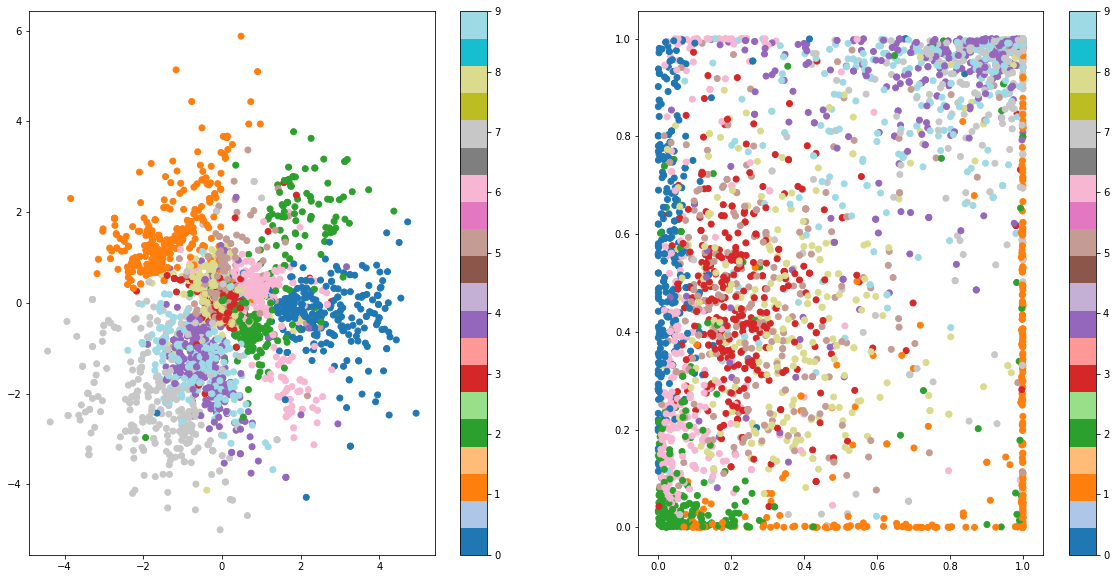

In [20]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(VAE_latents[:, 0], VAE_latents[:, 1], c=y_test0[indices], cmap='tab20')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(latents[:, 0], latents[:, 1], c=y_test0[indices], cmap='tab20')
plt.colorbar()
plt.show()

In [21]:
def inBetween(t,idx_1,idx_2):

    data_0 = x_train0[idx_1]
    data_1 = x_train0[idx_2]    
    data_t = (1-t)*x_train0[idx_1] + t*x_train0[idx_2]

    mu_0 = VAE_Encoder.predict(x_train[idx_1:idx_1+1]).squeeze()
    mu_1 = VAE_Encoder.predict(x_train[idx_2:idx_2+1]).squeeze()
    mu_t = (1-t)*mu_0 + t*mu_1


    ax2 = plt.subplot(2, 3, 1)
    ax2.imshow(data_0, cmap='Greys')

    ax3 = plt.subplot(2, 3, 2)
    ax3.imshow(data_t, cmap='Greys')

    ax4 = plt.subplot(2, 3, 3)
    ax4.imshow(data_1, cmap='Greys')

In [22]:
from ipywidgets import interact, FloatSlider , IntSlider
interact(inBetween,
        t=FloatSlider(value=0,min=0,max=1.0,step=0.02,)
        ,idx_1={"0":1,"1":3,"2":5,"3":7,"4":2,"5":0,"6":18,"7":15,"8":17,"9":19,}
        ,idx_2={"0":1,"1":3,"2":5,"3":7,"4":2,"5":0,"6":18,"7":15,"8":17,"9":19,})

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.02), Dropdown(description='idx_1…

<function __main__.inBetween(t, idx_1, idx_2)>